# LIDA Demo

**Authors**: Unnati Narang, Ye Joo Park

## Overview

### What is LIDA?

> LIDA is a library for generating data visualizations and data-faithful infographics.

- [Project Website](https://microsoft.github.io/lida/)
- [GitHub Repository](https://github.com/microsoft/lida/tree/main)

We will demonstrate a basic usage of the LIDA package in this notebook. 

## Setup

In [1]:
from lida import Manager, TextGenerationConfig, llm 
from lida.utils import plot_raster 
import os
import pandas as pd

Read the OpenAI API Key from a text file and store it into the `OPENAI_API_KEY` variable.

In [2]:
OPENAI_API_KEY = open('OPENAI_API_KEY.txt', 'r').read()

## Nike and Adidas Stock Prices

### 1.1 Summarize Data, Generate Goals

Lida offers a manager class that exposes core functionality of the LIDA system. Run the code below to initialize the `Manager` with `openai` as the backend.

In [3]:
lida = Manager(
    text_gen = llm(
        provider="openai",
        api_key=OPENAI_API_KEY
    )
)

Each manager method takes a `textgen_config` argument which is a dictionary that can be used to configure the text generation process (with parameters for model, temperature, max_tokens, etc). One of the keys in this dictionary is use_cache. If set to True, the manager will cache the generated text associated with that method. Use for speedup and to avoid hitting API limits.

First, configure LIDA to use the `"gpt-4-turbo"` model.

In [4]:
textgen_config = TextGenerationConfig(
    n=1,
    temperature=0.2,
    model="gpt-4o-mini",
    use_cache=False
)

Build a summary.

In [5]:
summary = lida.summarize(
    "nike-adidas-stock-price-2022-2023.csv",
    summary_method="default",
    textgen_config=textgen_config
)

Create goals.

In [6]:
goals = lida.goals(
    summary,
    n=2,
    textgen_config=textgen_config
)

for goal in goals:
    display(goal)


### Goal 0
---
**Question:** How do the stock prices of Adidas (ADS) and Nike (NKE) compare over time?

**Visualization:** `line chart of Date vs. ADS and Date vs. NKE`

**Rationale:** This visualization will allow us to compare the trends in stock prices for both Adidas and Nike over the specified date range. By plotting 'Date' on the x-axis and both 'ADS' and 'NKE' on the y-axis, we can observe patterns, correlations, and divergences in their stock performance, which is crucial for understanding market dynamics and making informed investment decisions.



### Goal 1
---
**Question:** What is the volatility of stock prices for Adidas (ADS) and Nike (NKE) during this period?

**Visualization:** `box plot of ADS and NKE`

**Rationale:** Using a box plot to visualize 'ADS' and 'NKE' will help us understand the distribution and variability of stock prices for both companies. This visualization will highlight the median, quartiles, and potential outliers, providing insights into the risk associated with each stock. Analyzing volatility is essential for a data analyst interested in assessing investment stability and making strategic recommendations.


In [7]:
summary = lida.summarize(
    "nike-adidas-stock-price-2022-2023.csv",
    summary_method="default",
    textgen_config=textgen_config
)

goals = lida.goals(
    summary,
    n=2,
    textgen_config=textgen_config
)

for goal in goals:
    display(goal)


### Goal 0
---
**Question:** How do the stock prices of Adidas (ADS) and Nike (NKE) compare over time?

**Visualization:** `line chart of Date vs ADS and Date vs NKE`

**Rationale:** This visualization will allow us to observe trends and fluctuations in stock prices for both Adidas and Nike over the specified date range. By plotting 'Date' on the x-axis and both 'ADS' and 'NKE' on the y-axis, we can identify periods of growth or decline, compare their performance directly, and analyze correlations between the two brands' stock movements.



### Goal 1
---
**Question:** What is the volatility of stock prices for Adidas (ADS) compared to Nike (NKE)?

**Visualization:** `box plot of ADS and NKE`

**Rationale:** Using a box plot to compare 'ADS' and 'NKE' will provide insights into the distribution and variability of stock prices for both companies. This visualization will highlight the median, quartiles, and potential outliers, allowing us to assess which stock has greater volatility and risk, which is crucial for investment decisions.


### 1.2 Generate Visualizations

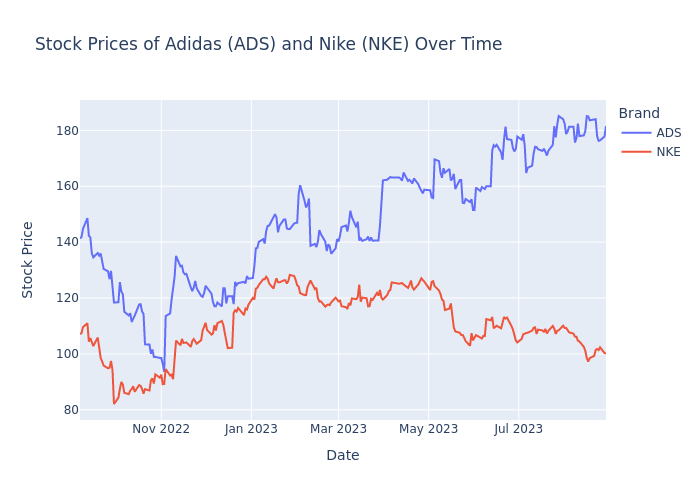

In [8]:
i = 0
library = "plotly"
charts = lida.visualize(
    summary=summary,
    goal=goals[i],
    textgen_config=textgen_config,
    library=library
)  

display(charts[0])

### 1.3 Refine the visual using natural language

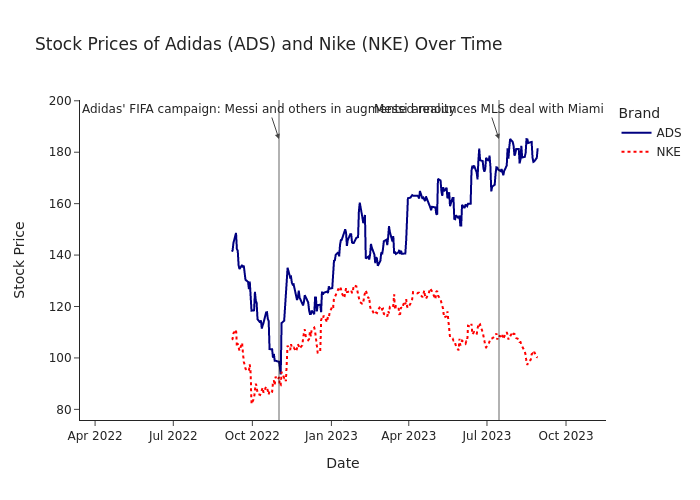

In [9]:
code = charts[0].code

instructions = [
    "use a simple_white background template",
    "get rid of gridliens",
    "change Adidas's line color to navy",
    "change Nike's line color to red",
    "change Nike's line style to dotted",
    "add a black solid vertical line on 2022-11-01",
    "add annotation on 2022-11-01 with the text \"Adidas' FIFA campaign: Messi and others in augmented reality\"",
    "add a black solid vertical line on 2023-07-15",
    "add annotation on 2022-07-15 with the text \"Messi announces MLS deal with Miami\""
]

edited_charts = lida.edit(
    code=code,
    summary=summary,
    instructions=instructions,
    library=library,
    textgen_config=textgen_config
)

edited_charts[0]

### 1.4 Explain the underlying code of the edited chart

In [10]:
code = edited_charts[0].code

explanations = lida.explain(
    code=code,
    library=library,
    textgen_config=textgen_config
) 

for row in explanations[0]:
    print(row["section"]," ** ", row["explanation"])

accessibility  **  The chart is a line plot that visually represents the stock prices of Adidas (ADS) and Nike (NKE) over time. The lines for ADS are colored navy, while the lines for NKE are displayed in red with a dotted style. The goal of the chart is to compare the stock price trends of these two brands over a specified period. Key insights include the ability to observe fluctuations in stock prices and significant events marked by vertical lines and annotations.
transformation  **  This section of the code transforms the 'Date' column in the DataFrame by converting it to a datetime format, which allows for proper time series analysis. The 'errors=coerce' parameter ensures that any invalid date entries are converted to NaT (Not a Time). Subsequently, the DataFrame is filtered to remove any rows where the 'Date' is NaT, ensuring that only valid dates are used in the visualization.
visualization  **  This part of the code enhances the visualization by adding vertical lines and annota

### 1.5 Create a visualization via a "User Query"

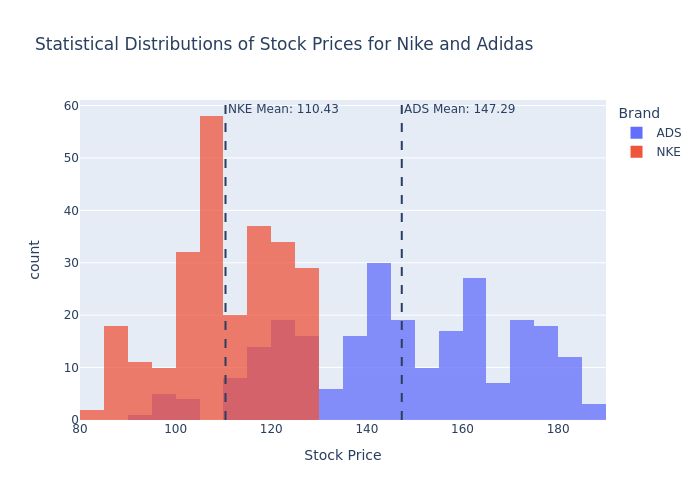

In [11]:
user_query = "What are the statistical distributions of the stock prices of Nike and Adidas?"

charts = lida.visualize(
    summary=summary,
    goal=user_query,
    textgen_config=textgen_config,
    library="plotly"
)  

charts[0]

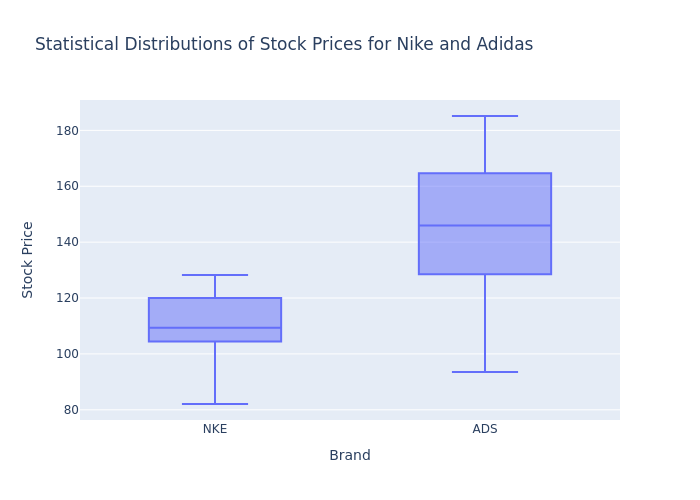

In [12]:
user_query = "What are the statistical distributions of the stock prices of Nike and Adidas? \
    Use a box plot to display the distributions."

charts = lida.visualize(
    summary=summary,
    goal=user_query,
    textgen_config=textgen_config,
    library="plotly",
)  

charts[0]